In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [54]:
data=pd.read_csv("breast-cancer.csv")

In [55]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [57]:
data.describe(include="all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

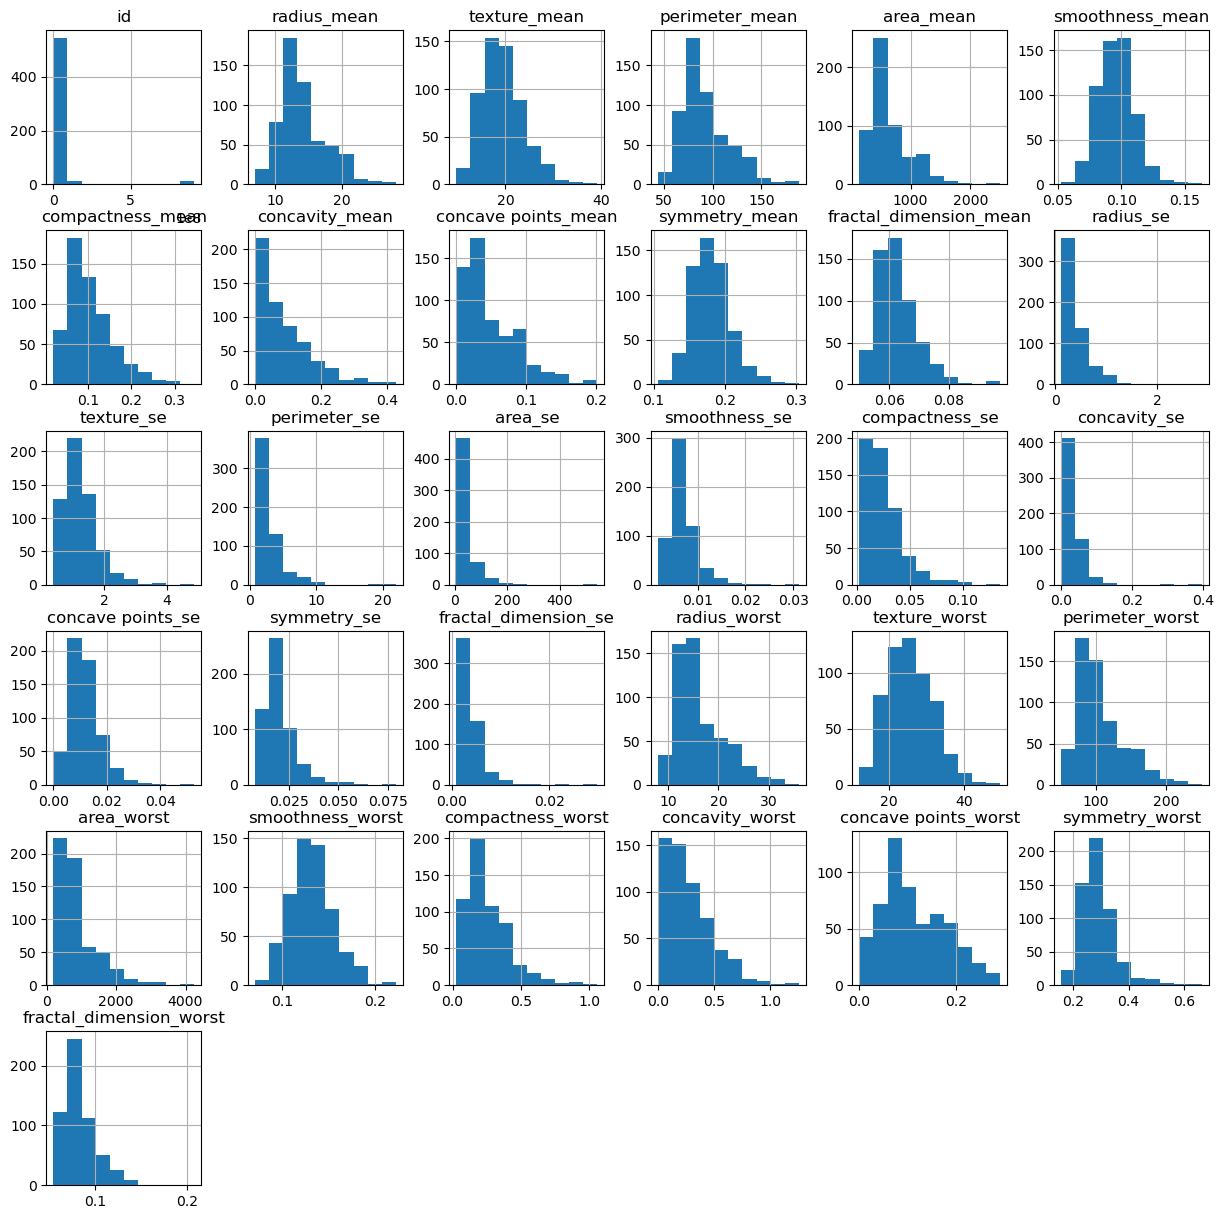

In [58]:
data.hist(figsize=(15,15))

<AxesSubplot:>

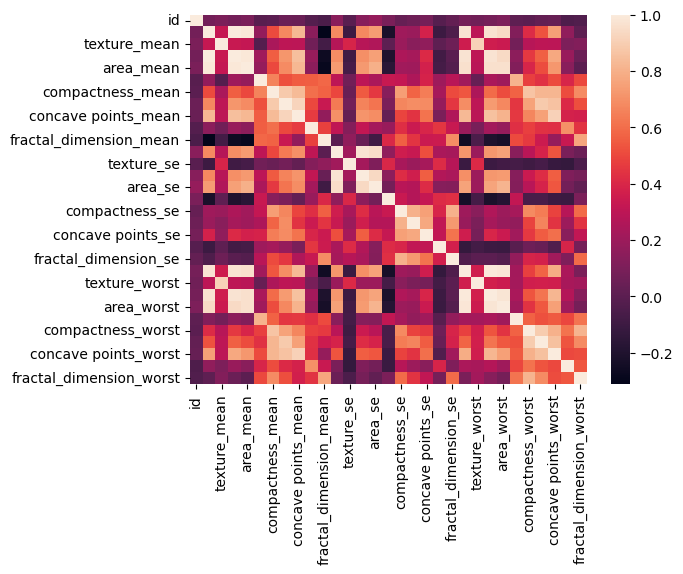

In [59]:
sns.heatmap(data=data.corr())

In [60]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [61]:
data.drop(['id'],axis=1,inplace=True)
# data.drop(['fractal_dimension_se'],axis=1,inplace=True)

In [62]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [64]:
data['diagnosis']=data['diagnosis'].replace({
    "M":0,
    "B":1
})

<AxesSubplot:xlabel='area_se'>

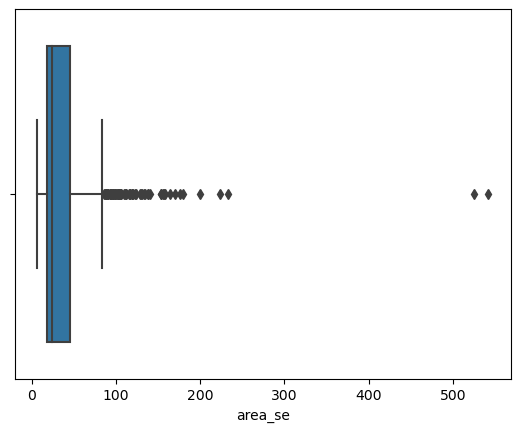

In [65]:
sns.boxplot(data['area_se'])

<AxesSubplot:xlabel='area_se'>

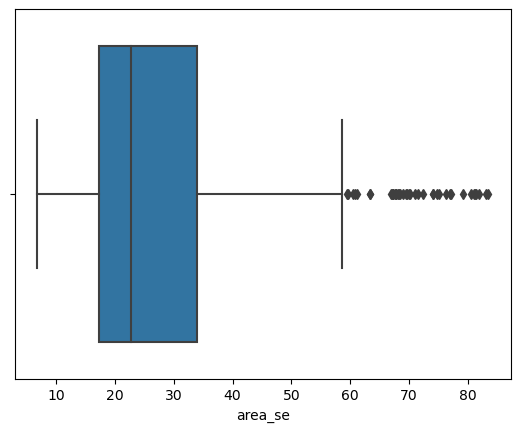

In [66]:
# remove outliers from the Na_to_K column
q1= data['area_se'].quantile(0.25)
q3=data['area_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['area_se']>upper].index
data=data.drop(i)
sns.boxplot(data['area_se'])

<AxesSubplot:xlabel='concave points_worst'>

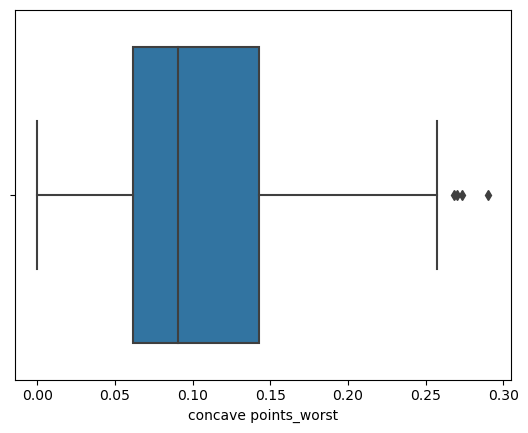

In [67]:
sns.boxplot(data['concave points_worst'])

<AxesSubplot:xlabel='concave points_worst'>

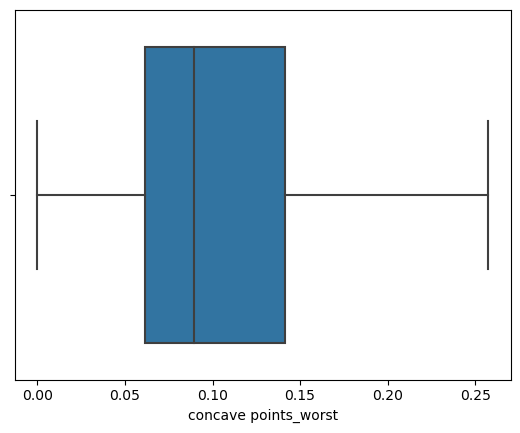

In [68]:
# remove outliers from the Na_to_K column
q1= data['concave points_worst'].quantile(0.25)
q3=data['concave points_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['concave points_worst']>upper].index
data=data.drop(i)
sns.boxplot(data['concave points_worst'])

<AxesSubplot:xlabel='radius_mean'>

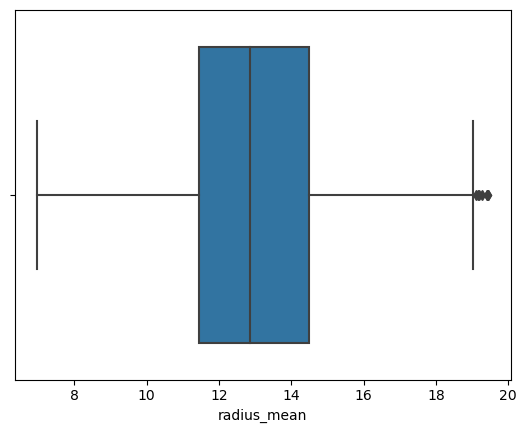

In [69]:
q1= data['radius_mean'].quantile(0.25)
q3=data['radius_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['radius_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['radius_mean'])

<AxesSubplot:xlabel='texture_mean'>

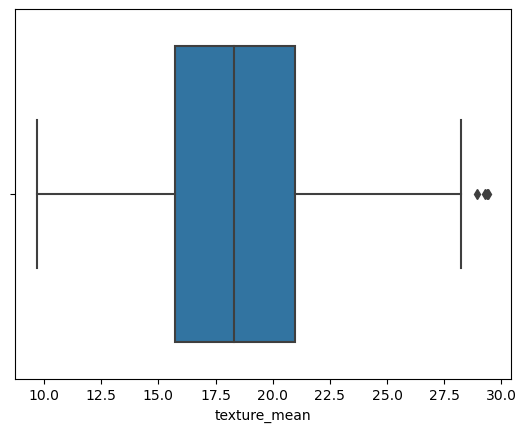

In [70]:
q1= data['texture_mean'].quantile(0.25)
q3=data['texture_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['texture_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['texture_mean'])

<AxesSubplot:xlabel='perimeter_mean'>

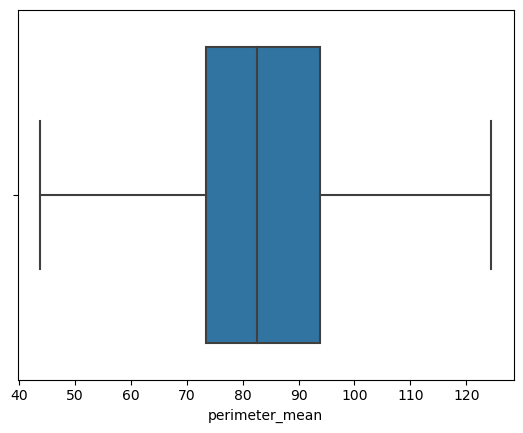

In [71]:
q1= data['perimeter_mean'].quantile(0.25)
q3=data['perimeter_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['perimeter_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['perimeter_mean'])

<AxesSubplot:xlabel='area_mean'>

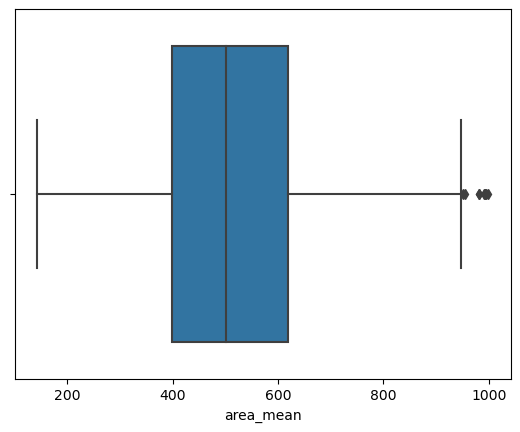

In [72]:
q1= data['area_mean'].quantile(0.25)
q3=data['area_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['area_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['area_mean'])

<AxesSubplot:xlabel='smoothness_mean'>

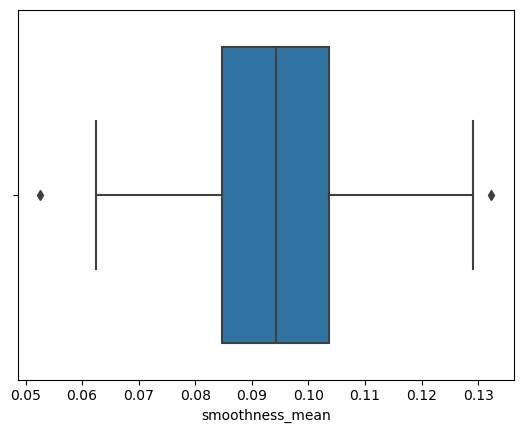

In [73]:
q1= data['smoothness_mean'].quantile(0.25)
q3=data['smoothness_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['smoothness_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['smoothness_mean'])

<AxesSubplot:xlabel='compactness_mean'>

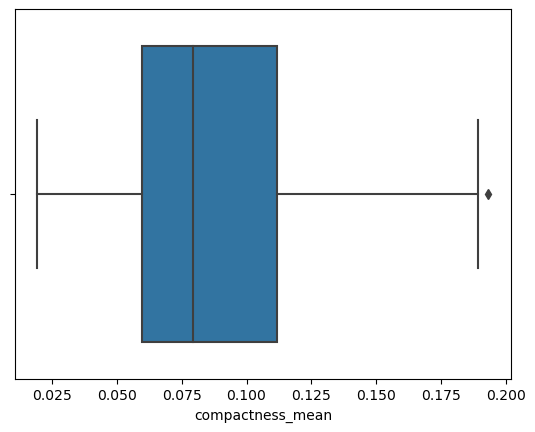

In [74]:
q1= data['compactness_mean'].quantile(0.25)
q3=data['compactness_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['compactness_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['compactness_mean'])

<AxesSubplot:xlabel='concavity_mean'>

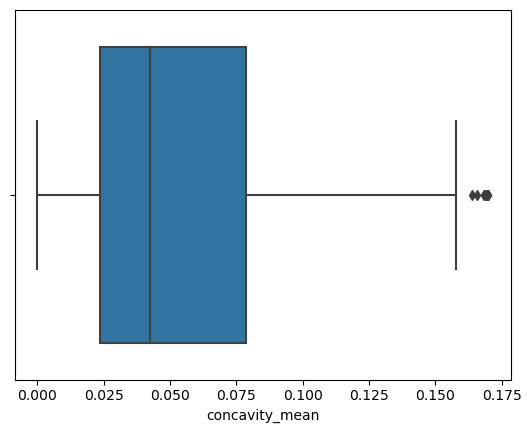

In [75]:
q1= data['concavity_mean'].quantile(0.25)
q3=data['concavity_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['concavity_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['concavity_mean'])

<AxesSubplot:xlabel='concave points_mean'>

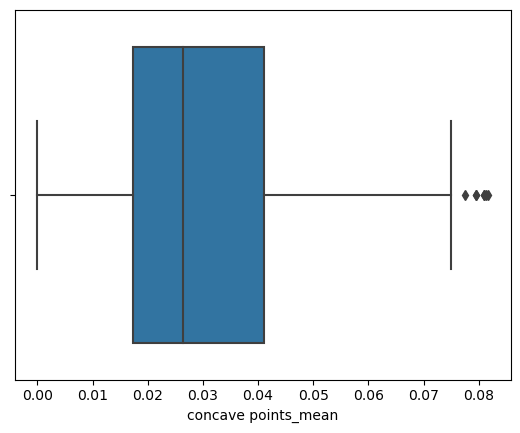

In [76]:
q1= data['concave points_mean'].quantile(0.25)
q3=data['concave points_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['concave points_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['concave points_mean'])

<AxesSubplot:xlabel='symmetry_mean'>

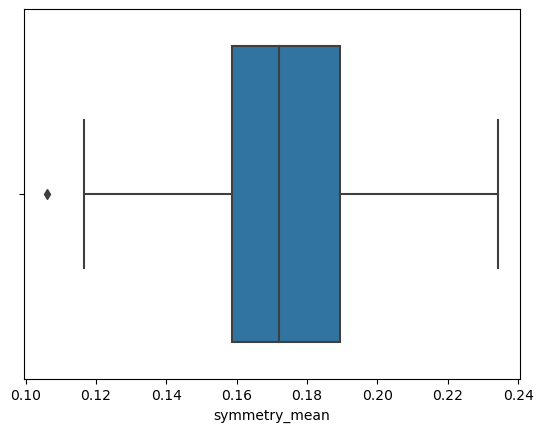

In [77]:
q1= data['symmetry_mean'].quantile(0.25)
q3=data['symmetry_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['symmetry_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['symmetry_mean'])

<AxesSubplot:xlabel='fractal_dimension_mean'>

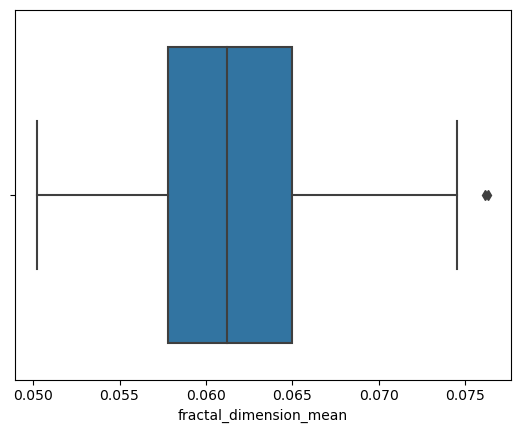

In [78]:
q1= data['fractal_dimension_mean'].quantile(0.25)
q3=data['fractal_dimension_mean'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['fractal_dimension_mean']>upper].index
data=data.drop(i)
sns.boxplot(data['fractal_dimension_mean'])

<AxesSubplot:xlabel='texture_se'>

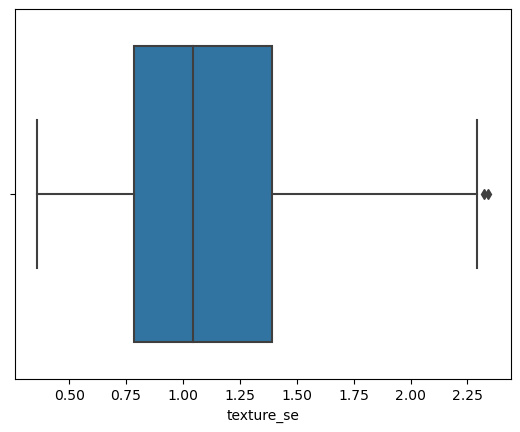

In [79]:
q1= data['texture_se'].quantile(0.25)
q3=data['texture_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['texture_se']>upper].index
data=data.drop(i)
sns.boxplot(data['texture_se'])

<AxesSubplot:xlabel='perimeter_se'>

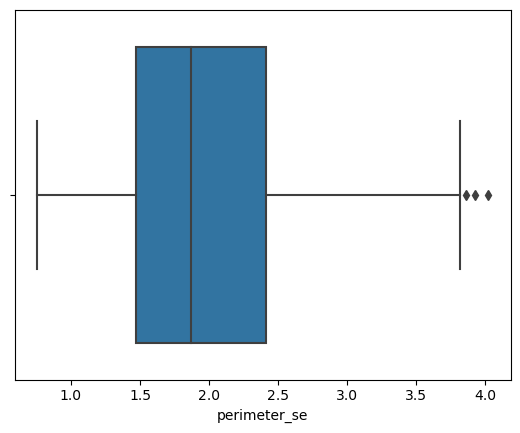

In [80]:
q1= data['perimeter_se'].quantile(0.25)
q3=data['perimeter_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['perimeter_se']>upper].index
data=data.drop(i)
sns.boxplot(data['perimeter_se'])

<AxesSubplot:xlabel='radius_se'>

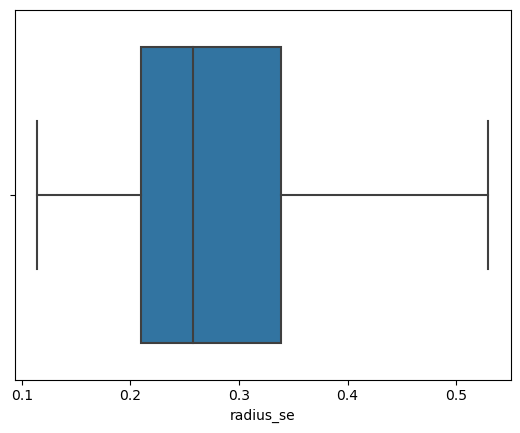

In [81]:
q1= data['radius_se'].quantile(0.25)
q3=data['radius_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['radius_se']>upper].index
data=data.drop(i)
sns.boxplot(data['radius_se'])

<AxesSubplot:xlabel='smoothness_se'>

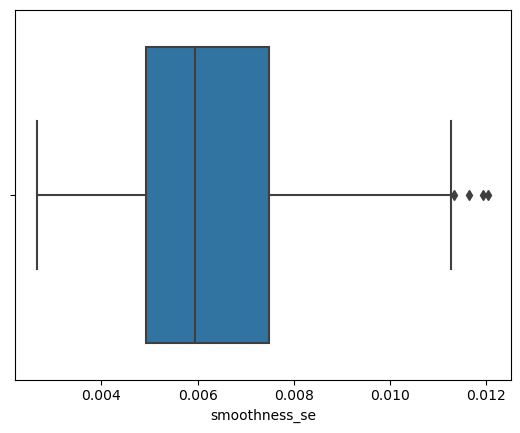

In [82]:
q1= data['smoothness_se'].quantile(0.25)
q3=data['smoothness_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['smoothness_se']>upper].index
data=data.drop(i)
sns.boxplot(data['smoothness_se'])

<AxesSubplot:xlabel='compactness_se'>

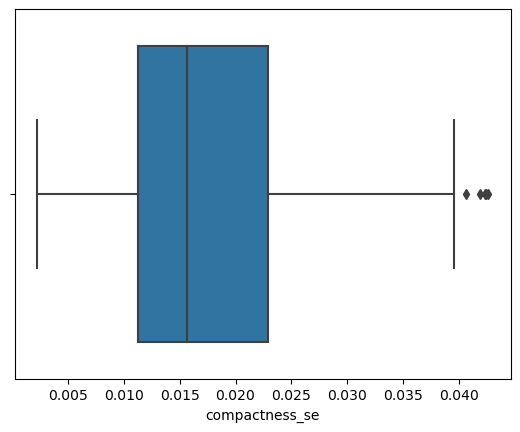

In [83]:
q1= data['compactness_se'].quantile(0.25)
q3=data['compactness_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['compactness_se']>upper].index
data=data.drop(i)
sns.boxplot(data['compactness_se'])

<AxesSubplot:xlabel='concavity_se'>

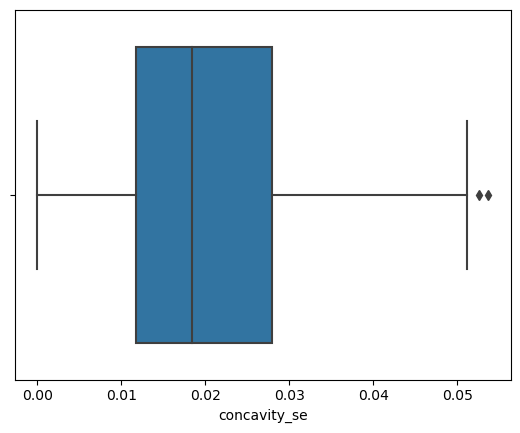

In [84]:
q1= data['concavity_se'].quantile(0.25)
q3=data['concavity_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['concavity_se']>upper].index
data=data.drop(i)
sns.boxplot(data['concavity_se'])

<AxesSubplot:xlabel='concave points_se'>

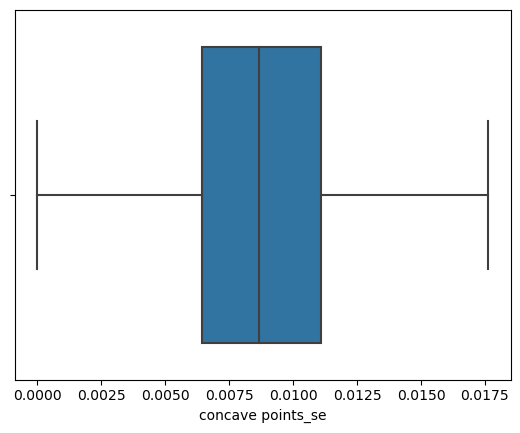

In [85]:
q1= data['concave points_se'].quantile(0.25)
q3=data['concave points_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['concave points_se']>upper].index
data=data.drop(i)
sns.boxplot(data['concave points_se'])

<AxesSubplot:xlabel='symmetry_se'>

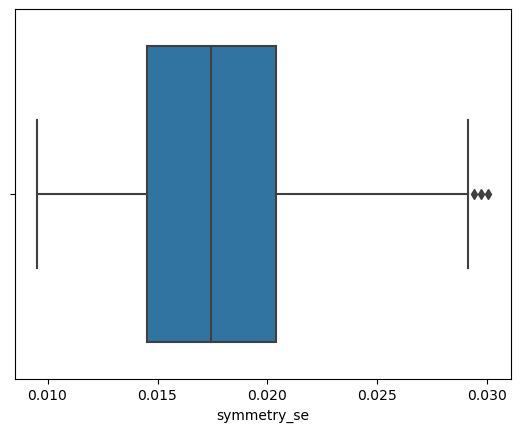

In [86]:
q1= data['symmetry_se'].quantile(0.25)
q3=data['symmetry_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['symmetry_se']>upper].index
data=data.drop(i)
sns.boxplot(data['symmetry_se'])

<AxesSubplot:xlabel='fractal_dimension_se'>

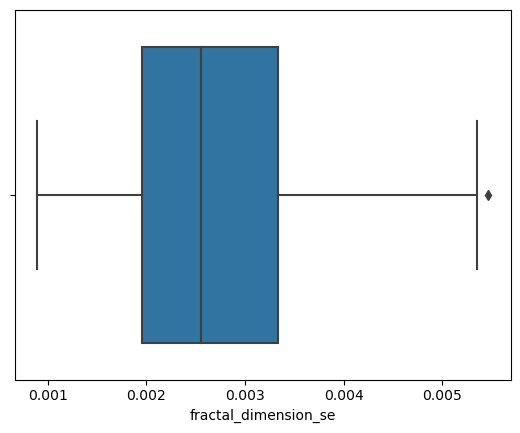

In [87]:
q1= data['fractal_dimension_se'].quantile(0.25)
q3=data['fractal_dimension_se'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['fractal_dimension_se']>upper].index
data=data.drop(i)
sns.boxplot(data['fractal_dimension_se'])

In [88]:
q1= data['radius_worst'].quantile(0.25)
q3=data['radius_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['radius_worst']>upper].index
data=data.drop(i)


<AxesSubplot:xlabel='texture_worst'>

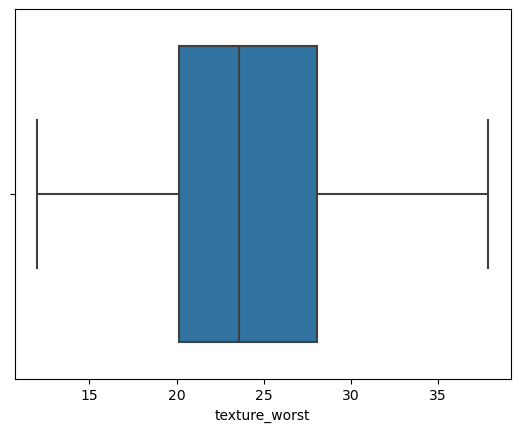

In [89]:
q1= data['texture_worst'].quantile(0.25)
q3=data['texture_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['texture_worst']>upper].index
data=data.drop(i)
sns.boxplot(data['texture_worst'])

<AxesSubplot:xlabel='perimeter_worst'>

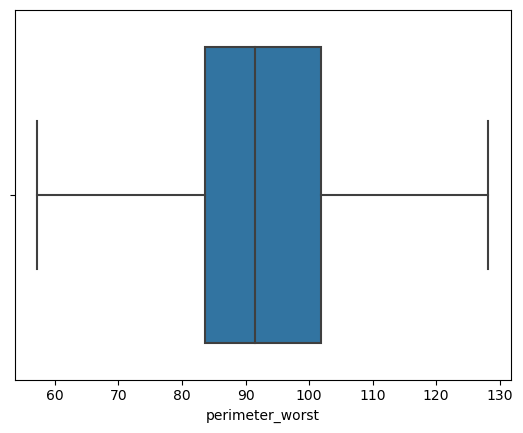

In [90]:
q1= data['perimeter_worst'].quantile(0.25)
q3=data['perimeter_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['perimeter_worst']>upper].index
data=data.drop(i)
sns.boxplot(data['perimeter_worst'])

<AxesSubplot:xlabel='area_worst'>

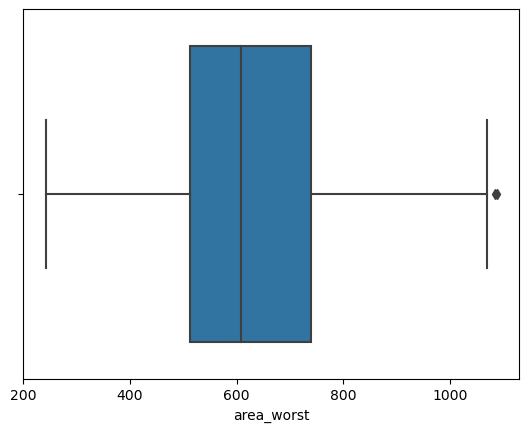

In [91]:
q1= data['area_worst'].quantile(0.25)
q3=data['area_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['area_worst']>upper].index
data=data.drop(i)
sns.boxplot(data['area_worst'])

<AxesSubplot:xlabel='smoothness_worst'>

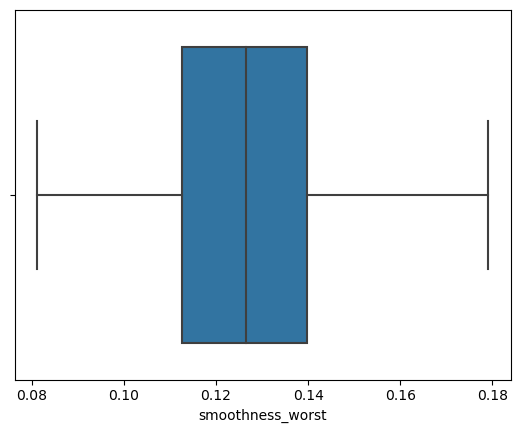

In [92]:
q1= data['smoothness_worst'].quantile(0.25)
q3=data['smoothness_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['smoothness_worst']>upper].index
data=data.drop(i)
sns.boxplot(data['smoothness_worst'])

<AxesSubplot:xlabel='concavity_worst'>

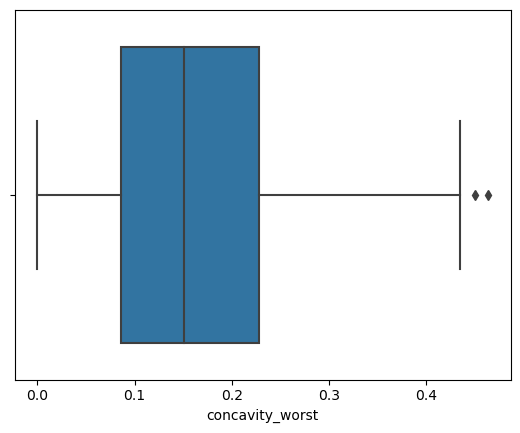

In [93]:
q1= data['concavity_worst'].quantile(0.25)
q3=data['concavity_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['concavity_worst']>upper].index
data=data.drop(i)
sns.boxplot(data['concavity_worst'])

<AxesSubplot:xlabel='symmetry_worst'>

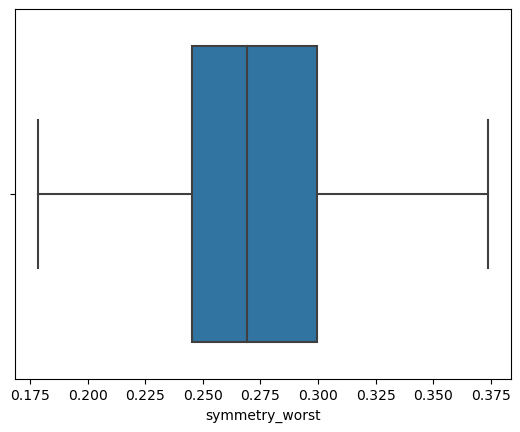

In [94]:
q1= data['symmetry_worst'].quantile(0.25)
q3=data['symmetry_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['symmetry_worst']>upper].index
data=data.drop(i)
sns.boxplot(data['symmetry_worst'])

<AxesSubplot:xlabel='fractal_dimension_worst'>

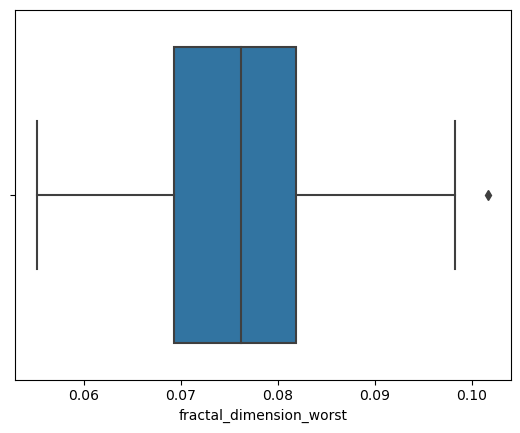

In [95]:
q1= data['fractal_dimension_worst'].quantile(0.25)
q3=data['fractal_dimension_worst'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
i=data[data['fractal_dimension_worst']>upper].index
data=data.drop(i)
sns.boxplot(data['fractal_dimension_worst'])

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

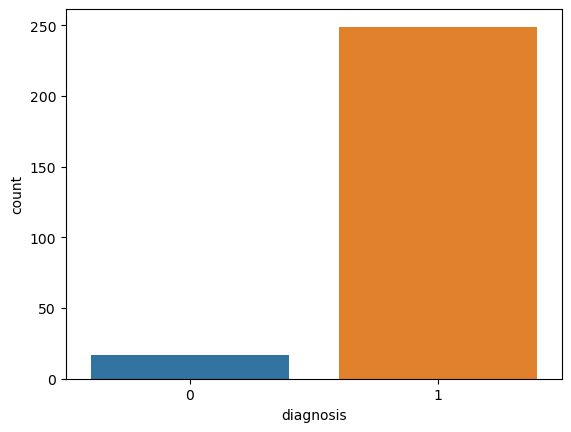

In [96]:
sns.countplot(data['diagnosis'])

In [97]:
data.drop(['texture_mean'],axis=1,inplace=True)
# data.drop(['texture_mean',"texture_se","fractal_dimension_se"],axis=1,inplace=True)

In [98]:
# sns.heatmap(data=data.corr())

In [99]:
x=data.drop(['diagnosis'],axis=1)
y=data["diagnosis"]

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.54219996 -0.58323203 -0.60601959 ... -0.52241951  2.22813212
  -0.68202075]
 [-1.75333661 -1.78151008 -1.63187256 ... -1.09162279 -0.34789985
   0.35341428]
 [-0.36206065 -0.34682477 -0.41627536 ...  0.04558229  1.93057976
   0.35771962]
 ...
 [-0.68631141 -0.65000355 -0.72634521 ... -0.59210561 -1.2956592
   0.04988758]
 [ 0.10029692  0.08358082  0.06965499 ...  0.55591283  0.41526684
   0.51163564]
 [ 0.21438515  0.305551    0.2154341  ... -0.26199774  1.45670008
  -0.37095971]]


In [102]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
LogPredict = logmodel.predict(X_test)
score=np.round(metrics.accuracy_score(Y_test, LogPredict),2)
conf=metrics.confusion_matrix(Y_test, LogPredict)
cr = metrics.classification_report(Y_test, LogPredict)
print(score)
print(cr)
print(conf)

0.98
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.99      0.99      0.99        74

    accuracy                           0.97        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.97      0.97      0.97        80

[[ 5  1]
 [ 1 73]]


In [105]:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(X_train,Y_train)
knnPredict = knnModel.predict(X_test)
knnAccuracy = metrics.accuracy_score(Y_test, knnPredict)
print(knnAccuracy)

0.95


In [104]:
# import joblib
# joblib_file = "job_placement_model"  
# joblib.dump(logmodel, joblib_file)
# loaded_model = joblib.load(open(joblib_file, 'rb'))
# pred_Y = loaded_model.predict(X_test)
# result = np.round(metrics.accuracy_score(Y_test, LogPredict) ,2)
# print(result)

0.98


e which factors are more
prominent in deciding the type of Breast Cancer?
_the factors according to correlation (
  texture_meant,texture_se,fractal_dimension_se
)
